Epoch 1/100
469/469 - 5s - loss: 0.0148 - accuracy: 0.9015 - val_loss: 0.0106 - val_accuracy: 0.9316 - 5s/epoch - 10ms/step
Epoch 2/100
469/469 - 4s - loss: 0.0089 - accuracy: 0.9429 - val_loss: 0.0080 - val_accuracy: 0.9483 - 4s/epoch - 8ms/step
Epoch 3/100
469/469 - 4s - loss: 0.0065 - accuracy: 0.9584 - val_loss: 0.0059 - val_accuracy: 0.9615 - 4s/epoch - 8ms/step
Epoch 4/100
469/469 - 3s - loss: 0.0051 - accuracy: 0.9678 - val_loss: 0.0051 - val_accuracy: 0.9680 - 3s/epoch - 7ms/step
Epoch 5/100
469/469 - 4s - loss: 0.0041 - accuracy: 0.9745 - val_loss: 0.0046 - val_accuracy: 0.9704 - 4s/epoch - 8ms/step
Epoch 6/100
469/469 - 4s - loss: 0.0034 - accuracy: 0.9800 - val_loss: 0.0040 - val_accuracy: 0.9739 - 4s/epoch - 8ms/step
Epoch 7/100
469/469 - 3s - loss: 0.0028 - accuracy: 0.9834 - val_loss: 0.0043 - val_accuracy: 0.9724 - 3s/epoch - 7ms/step
Epoch 8/100
469/469 - 4s - loss: 0.0024 - accuracy: 0.9860 - val_loss: 0.0038 - val_accuracy: 0.9757 - 4s/epoch - 8ms/step
Epoch 9/100
469

Epoch 66/100
469/469 - 1s - loss: 3.8034e-04 - accuracy: 0.9978 - val_loss: 0.0045 - val_accuracy: 0.9731 - 1s/epoch - 2ms/step
Epoch 67/100
469/469 - 1s - loss: 2.0514e-04 - accuracy: 0.9988 - val_loss: 0.0030 - val_accuracy: 0.9819 - 1s/epoch - 3ms/step
Epoch 68/100
469/469 - 1s - loss: 1.5098e-04 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9823 - 1s/epoch - 2ms/step
Epoch 69/100
469/469 - 1s - loss: 1.4155e-04 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9823 - 1s/epoch - 3ms/step
Epoch 70/100
469/469 - 1s - loss: 1.3227e-04 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9823 - 1s/epoch - 2ms/step
Epoch 71/100
469/469 - 1s - loss: 1.2869e-04 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9819 - 1s/epoch - 3ms/step
Epoch 72/100
469/469 - 1s - loss: 3.6181e-04 - accuracy: 0.9977 - val_loss: 0.0036 - val_accuracy: 0.9783 - 1s/epoch - 3ms/step
Epoch 73/100
469/469 - 1s - loss: 2.4653e-04 - accuracy: 0.9986 - val_loss: 0.0030 - val_accuracy: 0.981

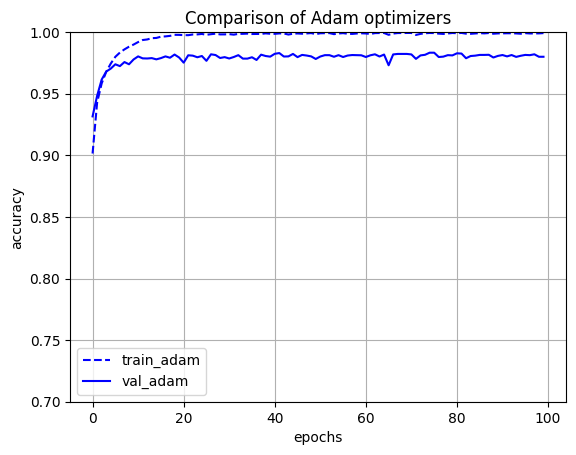

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# mlp_sgd=Sequential()
# mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
# mlp_sgd.add(Dense(units=10,activation='softmax'))

# mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
# hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)
# print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# plt.plot(hist_sgd.history['accuracy'],'r--')
# plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_adam(정확률)','val_adam(손실 정확률)'])
plt.grid()
plt.show()